Episode 0, Win Rate (Agent 1): 1.00, Win Rate (Agent 2): 0.00, Total Reward: 0
Episode 100, Win Rate (Agent 1): 0.52, Win Rate (Agent 2): 0.38, Total Reward: 0
Episode 200, Win Rate (Agent 1): 0.47, Win Rate (Agent 2): 0.47, Total Reward: 0
Episode 300, Win Rate (Agent 1): 0.45, Win Rate (Agent 2): 0.48, Total Reward: 2
Episode 400, Win Rate (Agent 1): 0.47, Win Rate (Agent 2): 0.47, Total Reward: 0
Episode 500, Win Rate (Agent 1): 0.47, Win Rate (Agent 2): 0.48, Total Reward: 0
Episode 600, Win Rate (Agent 1): 0.46, Win Rate (Agent 2): 0.48, Total Reward: 0
Episode 700, Win Rate (Agent 1): 0.46, Win Rate (Agent 2): 0.49, Total Reward: 0
Episode 800, Win Rate (Agent 1): 0.46, Win Rate (Agent 2): 0.49, Total Reward: 0
Episode 900, Win Rate (Agent 1): 0.46, Win Rate (Agent 2): 0.49, Total Reward: 0
Episode 1000, Win Rate (Agent 1): 0.46, Win Rate (Agent 2): 0.49, Total Reward: 0
Episode 1100, Win Rate (Agent 1): 0.46, Win Rate (Agent 2): 0.49, Total Reward: 0
Episode 1200, Win Rate (Agen

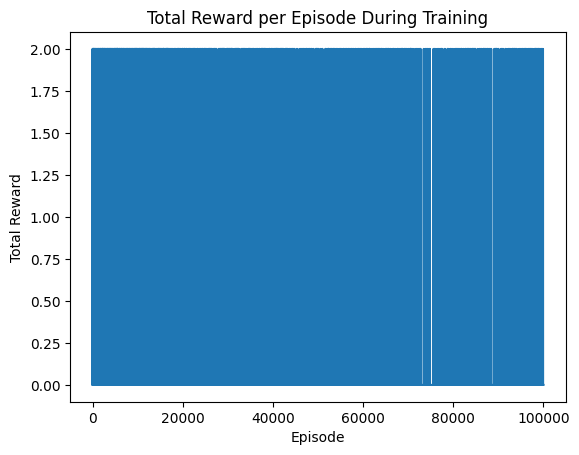

Agent 1 has the higher winning rate: 49502/100000


In [170]:
import numpy as np
import random
import matplotlib.pyplot as plt

class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3))
        self.done = False
        self.winner = None

    def reset(self):
        self.board = np.zeros((3, 3))
        self.done = False
        self.winner = None
        return self.board.flatten()

    def check_winner(self):
        for player in [1, -1]:  # Check for both players
            for i in range(3):
                if np.all(self.board[i, :] == player) or np.all(self.board[:, i] == player):
                    self.done = True
                    self.winner = player
                    return player
            if self.board[0, 0] == player and self.board[1, 1] == player and self.board[2, 2] == player:
                self.done = True
                self.winner = player
                return player
            if self.board[0, 2] == player and self.board[1, 1] == player and self.board[2, 0] == player:
                self.done = True
                self.winner = player
                return player
        if np.all(self.board != 0):
            self.done = True  # Draw
        return None

    def step(self, action, player):
        row, col = divmod(action, 3)
        if self.board[row, col] == 0:
            self.board[row, col] = player
            self.check_winner()
            return self.board.flatten(), self.winner, self.done
        return self.board.flatten(), None, self.done

class QLearningAgent:
    def __init__(self, epsilon=0.1, alpha=0.1, gamma=0.9):
        self.q_table = {}
        self.epsilon = epsilon  # Exploration rate
        self.alpha = alpha      # Learning rate
        self.gamma = gamma      # Discount factor

    def get_q_value(self, state, action):
        # Return the Q-value for a given state-action pair, or 0.0 if not present
        return self.q_table.get((tuple(state), action), 0.0)

    def update_q_value(self, state, action, reward, next_state):
        # Only consider valid actions in the next state
        valid_actions_next_state = [a for a in range(9) if next_state[a] == 0]

        # Compute the max future Q-value for the valid actions
        max_future_q = max([self.get_q_value(next_state, a) for a in valid_actions_next_state], default=0)

        # Current Q-value for the given state-action pair
        current_q = self.get_q_value(state, action)

        # Update Q-value using the Q-learning formula
        new_q = (1 - self.alpha) * current_q + self.alpha * (reward + self.gamma * max_future_q)
        self.q_table[(tuple(state), action)] = new_q

    def choose_action(self, state):
        # Get all valid actions (empty spots on the board)
        valid_actions = [i for i in range(len(state)) if state[i] == 0]

        # Explore with epsilon probability
        if random.random() < self.epsilon:
            return random.choice(valid_actions)  # Random valid action (explore)
        else:
            # Exploit: Select action with the highest Q-value among valid actions
            q_values = np.array([self.get_q_value(state, action) for action in valid_actions])
            return valid_actions[np.argmax(q_values)]  # Best valid action



def train_agent(episodes=100):
    env = TicTacToe()
    agent1 = QLearningAgent()
    agent2 = QLearningAgent()

    win_count1 = 0
    win_count2 = 0
    total_games = 0
    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        current_player = random.choice([-1, 1])

        while not done:
            if current_player == 1:
                action = agent1.choose_action(state)
            else:
                action = agent2.choose_action(state)

            next_state, winner, done = env.step(action, player=current_player)

            # Reward assignment
            if winner == 1:  # Agent 1 wins
                reward1 = 1
                reward2 = -1
                win_count1 += 1
            elif winner == -1:  # Agent 2 wins
                reward1 = -1
                reward2 = 1
                win_count2 += 1
            elif done:  # Draw
                reward1 = 1
                reward2 = 1
            else:
                reward1 = 0  # Continue game
                reward2 = 0

            if current_player == 1:
                agent1.update_q_value(state, action, reward1, next_state)
            else:
                agent2.update_q_value(state, action, reward2, next_state)  # Invert reward for player 2
            reward = reward1+reward2
            total_reward += reward
            state = next_state
            current_player *= -1  # Switch players

        rewards_per_episode.append(total_reward)
        total_games += 1

        # Print progress every 100 episodes
        if episode % 100 == 0:
            win_rate1 = win_count1 / total_games
            win_rate2 = win_count2 / total_games
            print(f"Episode {episode}, Win Rate (Agent 1): {win_rate1:.2f}, Win Rate (Agent 2): {win_rate2:.2f}, Total Reward: {total_reward}")

    # Plotting rewards per episode
    plt.plot(rewards_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode During Training')
    plt.show()

    # Output the agent with the higher winning rate
    if win_count1 > win_count2:
        print(f"Agent 1 has the higher winning rate: {win_count1}/{total_games}")
    elif win_count2 > win_count1:
        print(f"Agent 2 has the higher winning rate: {win_count2}/{total_games}")
    else:
        print("Both agents have the same winning rate.")

    return agent1 if win_count1 > win_count2 else agent2

def play_game(agent):
    env = TicTacToe()
    state = env.reset()
    done = False

    # Randomly choose the first player (1 for agent, -1 for human)
    first_player = random.choice([-1, 1])

    while not done:
        if first_player == -1:  # Human starts
            # Human player input
            while True:
                human_action = int(input("Enter your move (0-8): "))
                if env.board[human_action // 3, human_action % 3] == 0:
                    state, winner, done = env.step(human_action, player=-1)
                    break
                else:
                    print("Invalid move. Try again.")
            board = np.where(env.board == 1, 'X', np.where(env.board == -1, 'O', ' '))
            print(f"Human played: {human_action}, Board:\n{board}")

            if done:
                break

            # Agent's turn
            action = agent.choose_action(state)
            state, winner, done = env.step(action, player=1)
            board = np.where(env.board == 1, 'X', np.where(env.board == -1, 'O', ' '))
            print(f"Agent played: {action}, Board:\n{board}")

        else:  # Agent starts
            # Agent's turn
            action = agent.choose_action(state)
            state, winner, done = env.step(action, player=1)
            board = np.where(env.board == 1, 'X', np.where(env.board == -1, 'O', ' '))
            print(f"Agent played: {action}, Board:\n{board}")

            if done:
                break

            # Human player input
            while True:
                human_action = int(input("Enter your move (0-8): "))
                if env.board[human_action // 3, human_action % 3] == 0:
                    state, winner, done = env.step(human_action, player=-1)
                    break
                else:
                    print("Invalid move. Try again.")
            board = np.where(env.board == 1, 'X', np.where(env.board == -1, 'O', ' '))
            print(f"Human played: {human_action}, Board:\n{board}")

    if winner == 1:
        print("Agent wins!")
    elif winner == -1:
        print("You win!")
    else:
        print("It's a draw!")



# Training the agent
trained_agent = train_agent(episodes=100000)


In [171]:
# Play against the trained agent
play_game(trained_agent)

Enter your move (0-8): 0
Human played: 0, Board:
[['O' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Agent played: 1, Board:
[['O' 'X' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Enter your move (0-8): 8
Human played: 8, Board:
[['O' 'X' ' ']
 [' ' ' ' ' ']
 [' ' ' ' 'O']]
Agent played: 2, Board:
[['O' 'X' 'X']
 [' ' ' ' ' ']
 [' ' ' ' 'O']]
Enter your move (0-8): 4
Human played: 4, Board:
[['O' 'X' 'X']
 [' ' 'O' ' ']
 [' ' ' ' 'O']]
You win!
